In [1]:
import pandas as pd
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


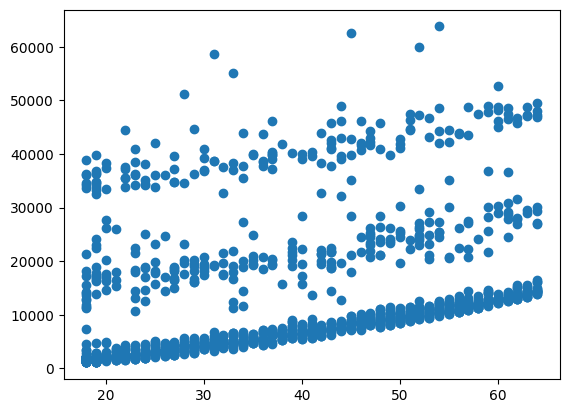

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data['age'],data['charges'])

In [3]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Fill missing values in 'sex', 'smoker', and 'region' columns
data['sex'].fillna('missing', inplace=True)
data['smoker'].fillna('missing', inplace=True)
data['region'].fillna('missing', inplace=True)

# Define mapping dictionaries
sex_mapping = {'male': 0, 'female': 1, 'missing': 2}
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3, 'missing': 4}
smoker_mapping = {'no': 0, 'yes': 1, 'missing': 2}

# Map the values in the 'sex' column
data['sex'] = data['sex'].map(sex_mapping)

# Map the values in the 'region' column
data['region'] = data['region'].map(region_mapping)

# Map the values in the 'smoker' column
data['smoker'] = data['smoker'].map(smoker_mapping)


In [10]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [11]:
x=data[['age','sex','bmi','children','smoker','region']]
y=data['charges']
print(y)
print(x)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [12]:
# import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=8)
print(x_train)
print(y_train)

      age  sex     bmi  children  smoker  region
78     22    1  39.805         0       0       3
130    59    1  26.505         0       0       3
1271   25    1  34.485         0       0       2
901    60    0  40.920         0       1       1
366    56    1  32.300         3       0       3
...   ...  ...     ...       ...     ...     ...
136    19    0  34.100         0       0       0
986    43    0  30.115         3       0       2
133    19    0  25.555         0       0       2
361    35    0  30.500         1       0       0
451    30    0  24.130         1       0       2

[896 rows x 6 columns]
78       2755.02095
130     12815.44495
1271     3021.80915
901     48673.55880
366     13430.26500
           ...     
136      1261.44200
986      8410.04685
133      1632.56445
361      4751.07000
451      4032.24070
Name: charges, Length: 896, dtype: float64


In [13]:
from sklearn.linear_model import LinearRegression 
#model is an object
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
model.score(x_train,y_train)
model.score(x_test,y_test)

0.7505352335701927

In [15]:
y_pred=model.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
943,1628.47090,248.396672
495,1967.02270,2691.357987
257,5400.98050,10726.888227
802,2103.08000,77.310888
93,5729.00530,8932.651436
...,...,...
1199,4934.70500,4575.480870
1276,2741.94800,4484.002055
45,20630.28351,13115.377594
384,8302.53565,7566.022164


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
lr= LinearRegression()
lr.fit(x_train,y_train)

svm=SVR()
svm.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(x_train, y_train)

GradientBoostingRegressor()

In [19]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})
df1

,Actual,lr,svm,rf,gr
943,1628.47090,248.396672,9408.391233,1624.937802,2780.781722
495,1967.02270,2691.357987,9408.772951,1992.321717,3512.210204
257,5400.98050,10726.888227,9483.676819,6731.484115,6034.530327
802,2103.08000,77.310888,9412.453154,2678.772599,10203.749913
93,5729.00530,8932.651436,9465.679006,7626.466394,8313.181861
...,...,...,...,...,...
1199,4934.70500,4575.480870,9444.437037,5620.220566,6032.143819
1276,2741.94800,4484.002055,9413.578492,2484.857618,4003.035405
45,20630.28351,13115.377594,9570.502127,10360.673876,10670.317654
384,8302.53565,7566.022164,9509.832536,9828.035042,8526.013248


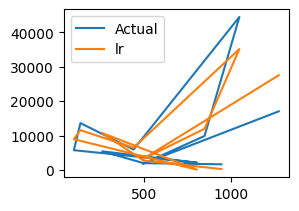

In [20]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

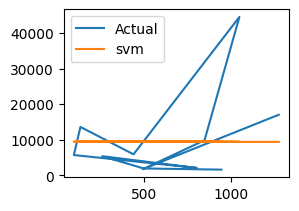

In [21]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

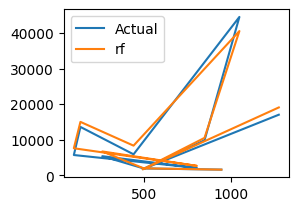

In [22]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

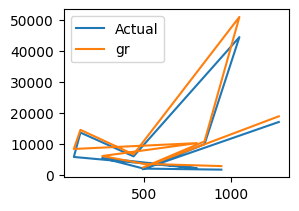

In [23]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()

In [24]:
from sklearn import metrics
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.7505352335701927 -0.07593953667037967 0.8459954979317261 0.8604377047175769


In [25]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)
print(s1,s2,s3,s4)

4066.2246236778774 8283.969540614533 2674.762433424209 2562.062345802052


PREDICT DATA FOR NEW DATA

In [26]:
data={'age': 40,'sex': 1,'bmi': 40.31,'children': 4,'smoker': 1,'region': 2}
df=pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.31,4,1,2


In [28]:
new_pred=gr.predict(df)
print("Medical Insurance for new customer is : ",new_pred[0])

Medical Insurance for new customer is :  42665.89946828867


SAVE DATA USING JOBLIB

In [29]:
gr=GradientBoostingRegressor()
gr.fit(x,y)
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [31]:
import joblib
joblib.dump(gr,'model__joblib__gr')
model=joblib.load('model__joblib__gr')
model.predict(df)

array([43262.52723738])

GUI

In [34]:
from tkinter import*
import joblib

In [36]:
def show_entry():

    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    model=joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master, text="Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)
 
master=Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",bg="black",fg="white").grid(row=0,columnspan=2)

Label(master,text="Enter your age").grid(row=1)
Label(master,text="MALE OR FEMALE [1/0]").grid(row=2)
Label(master,text="Enter your BMI values").grid(row=3)
Label(master,text="Enter Number of Children").grid(row=4)
Label(master,text="Smoker Yes/No [1/0]").grid(row=5)
Label(master,text="Region [1-4]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
 
Button(master,text="Predict",command=show_entry).grid()             

master.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\SANYA\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\SANYA\AppData\Local\Temp\ipykernel_24220\710657338.py", line 9, in show_entry
    model=joblib.load('model_joblib_gr')
  File "C:\Users\SANYA\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\numpy_pickle.py", line 650, in load
    with open(filename, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'model_joblib_gr'
